# Brian S Caffo
<hr>
Professor<br>
Departments of Biostatistics (primary)<br>
Department of Biomedical Engineering (courtesy)<br>
Johns Hopkins University<br>
bcaffo@gmail.com <br>
[www.bcaffo.com](www.bcaffo.com) <br>
This CV is my attempt at making one that's easier to maintain, suggestions welcome [github, https://github.com/bcaffo/cv](https://github.com/bcaffo/cv) <br>
Note if viewing pdf or print version, graphs are interactive on the [live version, https://bcaffo.github.io/cv/cvJupyter.html](https://bcaffo.github.io/cv/cvJupyter.html) 

## Summary
Brian Caffo, PhD is a professor in the Department of Biostatistics with a secondary appointment in the Department of Biomedical Engineering at Johns Hopkins University. 
He graduated from the University of Florida Department of Statistics in 2001. He has worked in statistical computing, statistical modeling, computational statistics, multivariate and decomposition methods and statistics in neuroimaging and neuroscience. He led teams that won the ADHD 200 prediction competition. He co-directs the SMART statistical group. With other faculty at JHU, he created and co-directs the Coursera Data Science Specialization, a 10 course specialization on statistical data analysis. He co-directs the JHU Data Science Lab, a group dedicated to open educational innovation and data science. He is the former director of the Biostatistics graduate programs and admissions committees. He is currently the co-director of the Johns Hopkins High Performance Computing Exchange super computing service center and past-president of the Bloomberg School of Public Health faculty senate.

## Education

| Year | Description | Institution | | 
|:---  |:---         | :--- | :--- | 
| 2006 | K25 training grant | NIH | *A mentored training program in imaging science* | 
| 2001 | PhD in statistics | U of Florida | *Candidate sampling schemes and some important applications* | 
| 1998 | MS in statistics|  U of Florida | |
| 1995 | Dual BS in mathematics and statistics | U of Florida | |

## Professional experience
| Year | Title | Place | 
| :--- | :---  | :---  |
|2019 - | Secondary | Dept of Biomedical Engineering, JHU |
|2019 - | Co-director | Johns Hopkins High Performance Computing Exchange (JHPCE)| 
| 2016 - | Faculty member | Kavli Neuroscience Discovery Institute |
| 2017 - | Faculty member | Malone Center for Engineering and Healthcare |
| 2014 - | Co-founding member | Johns Hopkins Data Science Lab |
|2011 - | Founding co-director | SMART research group |
|2013 - | Full professor | Dept of Biostat,JHU |
|2007-2013 | Associate professor | Dept of Biostat,JHU |
|2001-2007 | Assistant professor |Dept of Biostat,JHU |
|1996-1999 | Research assistant for professor Alan Agresti | Department of Stat, UFL | 
|1996, 1999 | Intern /  programmer | the Pediatric Oncology Group Statistical Office |


## Profesional activities

| Year | Activity | 
| :--- | :---     |
| 2005-2006 |Publications Officer for the Biometrics Section of the American Statistical Association |
| 2010 | Founding member Stat in Imaging ASA Section |
| 2010-2011 | Secretary Stat in Imaging ASA Section |
| 2006-2008 | Associate editor Computational Statistics and Data Analysis |
| 2008-2010 | Associate editor for the Journal of the American Statistical Association |
| 2009-2012 | Associate editor for the Journal of the Royal Statistical Society Series B |
| 2010-2012 | Associate editor for Biometrics
| | Senior program committee member for the Fourteenth International Conference on Artificial Intelligence and Statistics | 
| | Guest associate editor for Frontiers in Neuroscience special issues on Brain Imaging Methods and Explainable Artificial Intelligence in Healthcare and Finance |

Also, I try to do at least 1 or 2 NIH, EU, NSF ... review panels a year and a JSM or ENAR sessions.

## Honors and awards

| Year | Award | 
| :--- | :--- |
| 1998 | William S. Mendenhall Award |
| 1999 | Anderson Scholar/Faculty nominee for the University of  Florida CLAS |
| 2001 | University of Florida CLAS Dissertation Fellowship |
| 2001 | University of Florida Statistics Faculty Award |
| 2002 | Johns Hopkins Faculty Innovation Award |
| 2006 | Johns Hopkins Bloomberg School of Public Health AMTRA award |
| 2008 | Johns Hopkins Bloomberg School of Public Health Golden Apple teaching award |
| 2011 | Leader and organizer of the declared winning entry of the 2011 ADHD200 prediction competition |
| 2011 | Presidential Early Career Award for Scientists and Engineers (PECASE, 2010, awarded in 2011); *The highest honor bestowed by the United States government on science and engineering professionals in the early stages of their independent research careers* |
| 2014 | Named a Fellow of the American Statistical Association |
| 2015 | Special Invited Lecturer, European Meeting of Statisticians |

## Publications

Publications reported in Scopus as of 01/04/2021. My total number of Scopus publications is 228. Below is a plot of total publications by year. Hover data includes title, journal and citations.

In [76]:
import pandas as pd
import plotly.express as px
import numpy as np
import wordcloud as wc
import matplotlib.pyplot as plt
import os
from IPython.display import Image
pd.set_option("display.max_rows", 999)

dat = pd.read_csv("publications_01042022_2.csv")

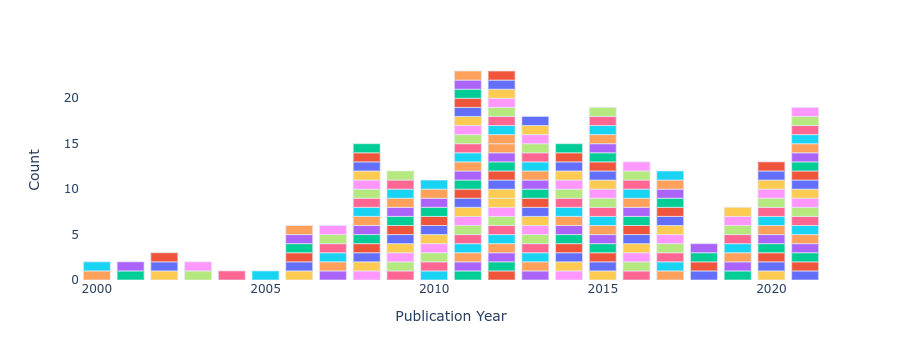

In [24]:
temp = dat
temp = temp.assign(Count = 1)
temp = temp.rename(columns = {'total' : 'Citations'})

fig = px.bar(temp, x = 'Publication Year', 
                 y = 'Count',
                 color = 'Document Title',
                 hover_data = ['Publication Year', 'Document Title', 'Journal Title', 'Citations'])

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.update_layout(showlegend=False)

## Static image
#Image(fig.to_image(format="png", width=400, height=250, scale=2))

fig.show()

Here are journals I publish in the most. Some of my favorite journals that I have published in less are JRSSA (1), JRSSB (2), JRSSC (1), Biometrika (1), IEEE TMI (1), JCGS (3), AJE (2), Brain (2), Biometrics (4), American Statistician (5), and Neuroimage Clinical (2).

In [81]:
temp = dat['Journal Title'].value_counts().reset_index()
temp = temp.rename(columns = {"index" : "Title", "Journal Title" : "Count"}).sort_values("Count", ascending =False)
mostFrequent = temp['Title'][temp['Count'] > 2].unique().tolist()
temp[temp['Count'] > 3]

,Title,Count
0,NeuroImage,16
2,Journal of the American Statistical Association,9
1,Biostatistics,9
3,Human Brain Mapping,7
4,Computational Statistics and Data Analysis,7
5,Annals of Applied Statistics,6
6,PLoS ONE,6
7,Statistics in Medicine,5
8,American Statistician,5
9,Progress in Biomedical Optics and Imaging - Pr...,4


I have published with 625 coauthors. Here is a list of authors that I have had 10 or over manuscripts with.

In [131]:
text = [s.split(',') for s in dat['Authors']]
text = [b.lstrip() for a in text for b in a]
#pd.set_option('display.max_rows', None)
authors = pd.DataFrame({'Author' : text}).value_counts().reset_index()#.sort_values("Author")
authors = authors.rename(columns = {0 : 'Count'})
authors[1 : 16]


,Author,Count
1,Crainiceanu C.,41
2,Pekar J.,28
3,Lindquist M.,23
4,Mostofsky S.,22
5,Hendrix C.,16
6,Punjabi N.M.,16
7,Nebel M.B.,15
8,Reich D.,14
9,Zhao Y.,13
10,Schwartz B.,11


In [210]:
text = dat['Document Title'].to_list()
titles = " ".join(text)
titles = titles.replace("Using", "")
titles = titles.replace("using", "")
titles = titles.replace("Based", "")
titles = titles.replace("based", "")
titles = titles.replace("BASED", "")

titleFile = open("titleFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'titleFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'titles.png')

Here's a wordcloud of words in the titles (excluding common use words, in the shape of an axial brain slice).

<img src= 'titles.png' alt="Wordcloud" style="height: 300px; width:300px;"/>

Here's the total citation counts of manuscripts plotted by year of publication. Hover over a point to see publication details.

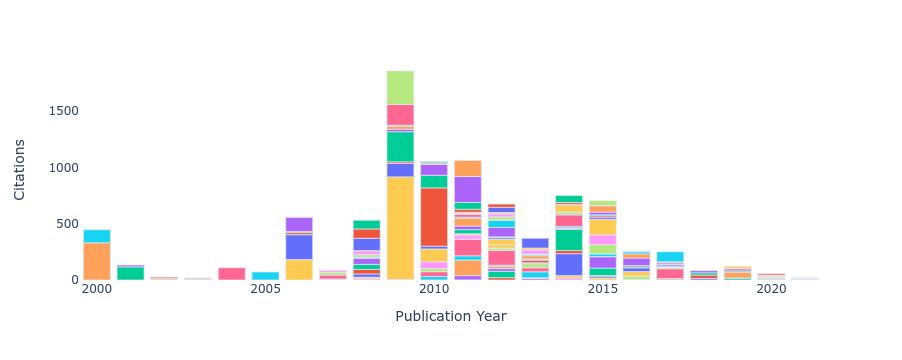

In [85]:
temp = dat
temp = temp.rename(columns = {'total' : 'Citations'})
fig = px.bar(temp, 
             x = 'Publication Year', 
             y = 'Citations', 
             color = 'Document Title',
             hover_data = ['Publication Year', 'Citations', 'Document Title', 'Journal Title'])

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.update_layout(showlegend=False)

## Static image
#Image(fig.to_image(format="png", width=400, height=250, scale=2))
fig.show()

## Part II
### Advisees

| Year | Degree | Advisee | Place | Title | Notes |
|:---  | :---   | :---    | :---  | :---- | :---  |
| 2005 | PhD | Leena Choi | JHU Biostat | *Modelling biomedical data and the foundations of bioequivalence*| |
| 2006 | ScM | Lijuan Deng |JHU Biostat | *Spline-based curve fitting with applications to kinetic imaging*||
| 2006 | MS | Bruce Swihart | University of Colorado Biostatistics | *Quantitative characterization of sleep architecture using multi- state and log-linear models* | jointly advised with Naresh Punjabi and Gary Grunwald |
| 2007 | MPH | Jeong Yun | JHU BSPH | *Incidence of hypertension in high risk groups of the Sleep Heart Health Study* | |
| 2008 | PhD  | Xianbin Li | JHU Biostat | *Modeling composite outcomes and their component parts* ||
| 2008 | PhD | Shu-Chih Su | JHU Biostat |*Structure/function relationships in the analysis of anatomical and functional neuroimaging data*| |
| 2010 | ScM | John Muschelli | JHU Biostat | *An iterative approach to hemodynamic response function temporal derivatives in statistical parametric mapping for functional neuroimaging* || 
| 2011 | PhD | Haley Hedlin | JHU Biostat | *Statistical methods for inter-subject analysis of neuroscience data* ||
| 2011 | PhD | Bruce Swihart | JHU Biostat | *From individuals to populations: application and insights concerning the generalized linear mixed model* ||
| 2012 | PhD | Jeff Goldsmith | JHU Biostat | *Cross-Sectional and longitudinal penalized functional regression* | co-advised with primary advisor Ciprian Crainiceanu |
| 2012 | MPH | Tiziano Marovino | JHU BSPH | *The concurrent validity of musculo-skeletal ultrasound imaging in comparison to MRI for detecting rotator cuff tears in the shoulder when performed in a physical therapy setting* ||
| 2013 | ScM | Rawan Al-Lozi | JHU Biostat | *An evaluation of statistical modeling methods for predicting recovery time from post-traumatic amnesia following moderate or severe traumatic brain injury in children* ||
| 2013 | PhD | Shanshan Li | JHU Biostat | *Statistical Methods for Evaluating Diagnostic Accuracy of Biomarkers* | co-advised with primary advisor Mei-Cheng Wang |
| 2013 | MHS | Xiaoqiang Xu | JHU Biostat | *Parallel Voxel Level Anything* ||
| 2015 | PhD | Juemin Yang  | JHU Biostat | *Statistical Methods for Brain Imaging and Genomic Data Analysis* ||
| 2015 | PhD | Shaojie Chen | JHU Biostat |*Statistical Methods to Analyze Massive High-Dimensional Neuroimaging Data* ||
| 2015 | PhD | Fang Han     | JHU Biostat | *Large-scale nonparametric and semiparametric inference for large complex and noisy datasets* | Co-advised with Han Liu |
| 2016 | PhD | Chen Yue | JHU Biostat |*Generalizations, extensions and applications for principal component analysis* | co-advised with Vadim Zipunnikov |
| 2016 | PhD | Amanda Mejia | JHU Biostat | *Statistical Methods for Functional Magnetic Resonance Imaging Data* | co-advised with primary advisor Martin Lindquist |
| 2016 | PhD | Aaron Fisher | JHU Biostat | *Methods for High Dimensional Analysis, Multiple Testing, and Visual Exploration* | co-advised with primary advisor Vadim Zipunnikov |
| 2016 | PhD | Huitong Qiu  | JHU Biostat | *Statistical Methods and Theory for  Analyzing High Dimensional Time Series* | |
| 2020 | PhD | Zeyi Wang    | JHU Biostat | *Statistical Analysis of Functional Connectivity in Brain Imaging: Measurement Reliability and Clinical Applications* | co-advised with Joshua Vogelstein|
| 2020 | MSE | Luchao Qi | JHU BME | *Associations between Body Mass Index (BMI) and Physical Activity: National Health and Nutritional Examination Survey (NHANES) 2005-2006*||
| 2021 | PhD | Bingkai Wang | JHU Biostat | *Statistical Methods for Analyzing Randomized Trials and Brain Imaging Data* | co-advised with primary advisor Michael Rosenblum |
| | PhD | Huan Chen | JHU Biostat | In progress | |
| | PhD | Bohao Tang | JHU Biostat | In progress |  |
| | PhD | Eric Bridgeford | JHU Biostat | In progress | Co advised with primary advisor Joshua Vogelstein|

### Post doctoral advisees

| Years | Name | Notes |
| :--- | :--- | :--- |
| 2009-2012 | Vadim Zipunnikov | co-advising with primary advisor Ciprian Crainiceanu |
| 2010-2013 | Ani Eloyan | co-advising with Ciprian Crainiceanu |
| 2011-2013 | Seonjoo Lee | co-advising with primary advisor Dzung Pham |
| 2017-2020 | Yi Zhao | co-advising with Stewart Mostofsky and Martin Lindquist 
| 2017-2020 | Heather Shappell | co-advising with Jim Pekar and primary advisor Martin Lindquist |

### Student exam participation

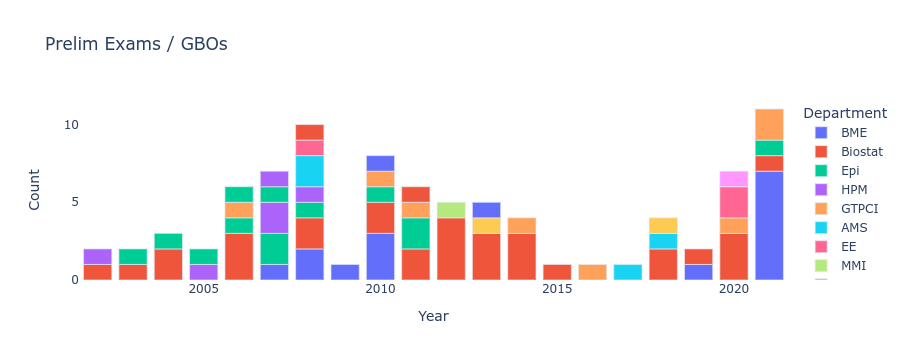

In [86]:
exams = pd.read_csv("exams.csv")
exams['Exam'] = exams['Exam'].str.strip()
exams['Department'] = exams['Department'].str.strip()
exams = exams[ ['Year', 'Department', 'Exam'] ].value_counts().reset_index()
exams = exams.rename(columns = {0 : 'Count'})

fig = px.bar(exams[ exams['Exam'] == "prelim"], x = "Year", y = "Count", color = "Department", title = "Prelim Exams / GBOs")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})


## Static image
#Image(fig.to_image(format="png", width=600, height=300, scale=2))
## Interactive
fig.show()

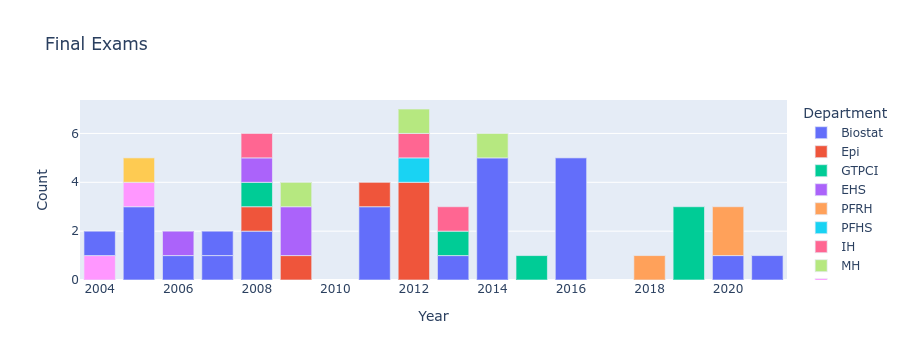

In [9]:
fig = px.bar(exams[ exams['Exam'] == "final"], x = "Year", y = "Count", color = "Department", title = "Final Exams")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

## Static
#Image(fig.to_image(format="png", width=600, height=300, scale=2))
## Interactive
fig.show()

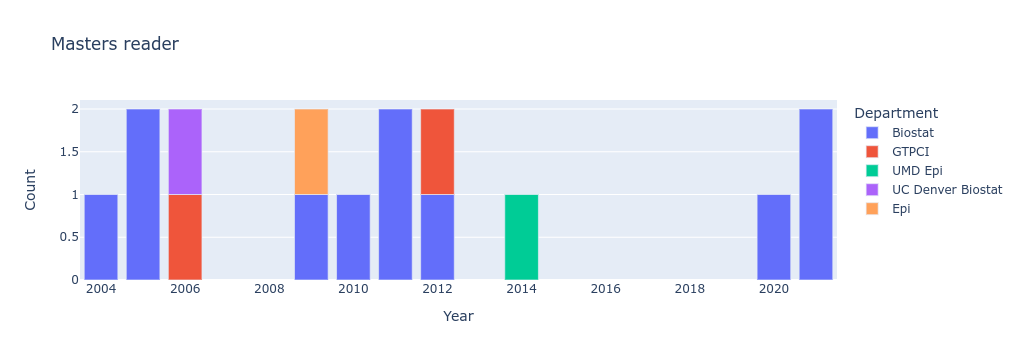

In [45]:
fig = px.bar(exams[ exams['Exam'] == "masters"], x = "Year", y = "Count", color = "Department", title = "Masters reader")

fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

## Static
#Image(fig.to_image(format="png", width=600, height=300, scale=2))
## Interactive
fig.show()

### Classroom Instruction 
| Years | Role | Course title | Place | Notes | 
| :--- | :--- | :--- | :--- | :--- |
| 2001-2005 | Primary instructor | Advanced Statistical Computing | JHU | Regular course |
| 2003-2004 | Primary instructor | Advanced Methods in Biostatistics IV | JHU | Regular course |
| 2003-2004 | Guest lecturer | Advanced Methods in Biostatistics II | JHU | Regular course |
| 2003-2008 | Guest lecturer | Computing orientation and student computing club | JHU | Regular course |
| 2003-2004 2008 | Primary instructor | Statistical Computing | JHU | Regular course |
| 2004-2005 | Primary instructor | Advanced Methods in Biostatistics III | JHU | Regular course | 
| 2005-2010 | Primary instructor | Methods in Biostatistics  I | JHU | Regular course |
| 2005-2010 | Primary instructor | Methods in Biostatistics II | JHU | Regular course |
| 2008      | Primary instructor | Medical Imaging Statistics | JHU | Regular course |
| 2010-2017 | Guest lecturer | Public Health Perspectives Biostatistics Module | JHU | Regular course |
| 2011-2014 | Primary instructor | Advanced Methods in Biostatistics I and II | JHU | Regular course |
| 2013      | Guest instructor | ICTR training program | JHU | Regular course |
| 2015-2018 | Primary instructor | Advanced Linear Models I and II | JHU | Regular course |
| 2019-2021 | Primary instructor | Introduction to Data Science for Biomedical Engineering | JHU | Regular course |
| 2019-2021 | Primary instructor | Advanced Data Science for BME | JHU | Regular course |
| 2019-     | Primary instructor | Data Science for Public Health I and II | JHU | Regular course |
| 2011      | Co-instructor | Statistical methods for new high throughput technological measurements | ENAR | Short course |
| 2015      | Co-organizer | Data Science Hackathon | JHU | Short course |
| 2017-2019 | Co-instructor | Quarterly MRICloud and R tutorial series | JHU | Short course |
| 2012 -    | Primary instructor | Mathematical Biostatistics Boot Camp | Coursera | MOOC | 
| 2013 -    | Primary instructor | Mathematical Biostatistics Boot Camp 2 | Coursera | MOOC | 
| 2018 -    | Primary instructor | Advanced Linear Models for Data Science 1: Least Squares | Coursera | MOOC |
| 2018 -    | Primary instroctor | Advanced Linear Models for Data Science 2: Statistical Linear Models | Coursera | MOOC |
| 2014 -    | Co developer       | Data Science Specialization (with Roger Peng and Jeff Leek) | Coursera | MOOC Specialization |
| 2014 -    | Primary instructor | Statistical Inference | Coursera | MOOC | 
| 2014 -    | Primary instructor | Regression Models | Coursera | MOOC |
| 2014 -    | Primary instructor | Developing Data Products | Coursera | MOOC |
| 2014 -    | Support instructor | Data Scientist's Toolbox | Coursera | MOOC |
| 2014 -    | Support instructor | R programming | Coursera | MOOC |
| 2014 -    | Support instructor | Getting and Cleaning Data | Coursera | MOOC |
| 2014 -    | Support instructor | Exploratory Data Analysis | Coursera | MOOC | 
| 2014 -    | Support instructor | Reproducible Research | Coursera | MOOC |
| 2014 -    | Support instructor | Practical Machine Learning | Coursera | MOOC |
| 2014 -    | Co instructor | Data Science Specialization Capstone | Coursera | MOOC |
| 2018 -    | Co developer |  Executive Data Science Specialization (with Roger Peng and Jeff Leek) | Coursera | MOOC Specialization |
| 2018 -    | Co instructor |  A Crash Course in Data Science | Coursera | MOOC |
| 2018 -    | Co instructor | Building a Data Science Team | Coursera | MOOC |
| 2018 -    | Co instructor | Managing Data Analyses | Coursera | MOOC |
| 2018 -    | Co instructor | Data Science in Real Life | Coursera | MOOC |
| 2018 -    | Co instructor | Executive Data Science Specialization Capstone Project Course | Coursera | MOOC |


##### E-books
| Title | Publisher | Couathors |
| :--- | :--- |  :--- |
| *Statistical Inference* | Leanpub | |
| *Regression Models* | Leanpub | |
| *Developing Data Products* | Leanpub | |
| *Advanced Linear Models for Data Science* | Leabpub | |
| *Methods in Biostatistics with R* | Leanpub | John Muschelli, Ciprian Crainiceanu |
| *Executive Data Science* | Leanpub | Roger Peng, Jeff Leek |

##### Other
+ PI (roll of executive producer, non-instructor) for the BD2K R25 Genomic Data Science Specialization, fMRI 1 and 2 (Lindquist / Wager), Neurohacking in R (Craininceanu, Sweeney, Muschelli), Neuroscience for Neuroimaging (Baker)
+ swirl: Mentored project by Nick Carchedi intiated during his internship
+ Course notes for Biostatistics 140.651-2 listed on the Johns Hopkins Open Courseware project 

### Research support, PI grants

| Dates | Mechanism | Title | 
| :--- | :--- | : --- |
| 2002 - 2003 | JHBSPH Faculty Innovation Award | *Monte Carlo and Markov chain Monte Carlo Algorithms for Conditional and Random Effect Models for Categorical Data* |
| 05/01/2006-04/30/2009  | NIH NIBIB K25 EB003491 | *A mentored training program in imaging science* | 
| 09/30/2010-8/31/2014   | NIH NIBIB R01 EB012547 | *Statistical methods for hierarchical large n large p problems* |
| 12/01/2014-11/30/2017  | NIH R25EB020378        | *Big Data Education for the Masses: MOOCs, Modules and Intelligent Tutoring Systems* |
| 09/01/2011- 08/31/2016 | NIH NIBIB P41 EB015909 | *Resource for quantitative functional MRI* R01 component of a P41 grant. R01 PIs Caffo/Pekar, P41 PI Van Zijl |
| 3/14/2012-3/14/2014 | Amazon AWS Research Grant | *Cloud-Based Development of Neuroimaging Software* | 
| 08/27/2012 - 8/26/2014 | BSI Award | Johns Hopkins Brain Science Institute *The Center for Quantitative Neuroscience: a core for population neuroanalytics and translational systems neuroscience* as part of the RFA *Traumatic brain injury: mechanisms and treatment* |
| 8/16/2019 | NVIDIA hardware grant | *GPU Accelerated Statistical Inference* |
| 05/07/2021 - 03/21/2025 | R01 EB029977 | *Statistical methods for structural and functional integration in multi-modal neuroimaging data*|


### Co-investigator and subcontract awards
Please contact [the JHU Department of Biostat](https://publichealth.jhu.edu/departments/biostatistics) for Co-I information.

### JHU major academic service 
| Year          | Organization  | Role |
| :---          | :---          | :--- |
| 2021          | JHU           | Access and Retention Subcommittee |
| 2021-         | JHBSPH        | Data Council  |
| 2021-         | IDIES         | Executive Board |
| 2021          | JHU           | Univeristy Pandemic Academic Advisory Committee |
| 2019-         | Biostat       | JHPCE Co-director |
| 2021/2022     | Malone Center | Director search committee | 
| 2019-2022     | JHBSPH        | Faculty senate president-elect, president, past-president |
| 2017-2019     | JHBPSH        | Honors and Awards committee |
| 2017 - 2018   | JHSPH         | Faculty Innovation Fund grant referee | 
| 2016          | BME           | Data science faculty search committee | 
| 2016          | Biostat       | Faculty Search committee |
| 2016-         | Malone Center | Steering Committee |
| 2019-         | Malone Center | Seed Grant review committee | 
| 2002 - 2009, 2010 - 2020 | Biostatistics | Admissions committee (PhD, ScM, MHS) | 
| 2010 - 2012   | Biostatistics | Co-director of the graduate program | 
| 2012 - 2016   | Biostatistics | Director of the graduate program | 
| 2001 - 2009   | Biostatistics | Information technology committee member |
| 2001 - 2002   | Biostatistics | Seminar coordinator | 
| 2008 - 2010   | MPH           | Co-director Biostatistics/Epidemiology MPH concentration |
| 2003          | JHBSPH        | Co-organizer Junior Faculty Meetings |  
| 2007 - 2010   | JHBSPH        | CEDC (originally Committee on Affirmative Action) member |
| 2002 - 2004   | JHBSPH        | Faculty Senate representative | 
| 2009 - 2011   | MPH           | Admissions Committee member |
| 2009 -  2011  | MPH           | Executive Board member |

Also, I serve on ad hoc tenure and promotion committees whenever asked (not that often, maybe once every other year or so).

### Seminars
Here's a plot of the invited seminars I've logged. The list with presentation files can be found 
[here](https://docs.google.com/spreadsheets/d/1mRC6xxZmNj3DnwwvCh_8GpErwhvJNq9gkRB3mQz1JIg/edit?usp=sharing).

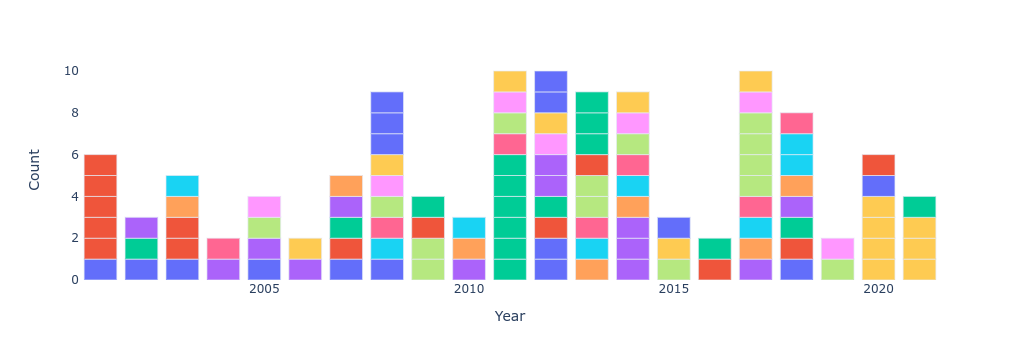

In [59]:
seminars = pd.read_csv("https://docs.google.com/spreadsheets/d/1mRC6xxZmNj3DnwwvCh_8GpErwhvJNq9gkRB3mQz1JIg/export?format=csv&gid=0")
seminars = seminars.assign(Count = 1)
#seminarYear = seminars['Year'].value_counts().reset_index()
#seminarYear = seminarYear.rename(columns = {"index" : "Year", "Year" : "Count"}).sort_values("Year", ascending =False)
#fig = px.bar(seminarYear, x = "Year", y = "Count")
fig = px.bar(seminars, x = "Year", y = "Count", color = "Talk",
             hover_data = ['Year', 'Talk', 'Where'])
fig = fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'})

fig.update_layout(showlegend=False)

## Static
#Image(fig.to_image(format="png", width=400, height=200, scale=2))
## Interactive
fig.show()

Here's wordclouds of seminar titles and seminar places.

In [211]:
text = seminars['Talk'].to_list()
titles = " ".join(text)
#titles = titles.replace("Using", "")

titleFile = open("seminarTitleFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'seminarTitleFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'seminarTitles.png')

In [232]:
text = seminars['Where']
text = text[~text.isna()].to_list()
titles = " ".join(text)
titles = titles.replace("Talk", "")
titles = titles.replace("Given", "")
titles = titles.replace("talk", "")
titles = titles.replace("given", "")
titles = titles.replace("Research", "")
titles = titles.replace("research", "")

titleFile = open("seminarWhereFile.txt", "w")
titleFile.write(titles)
titleFile.close()


import stylecloud as sc
sc.gen_stylecloud(file_path = 'seminarWhereFile.txt', 
                  icon_name = 'fas fa-brain',
                  stopwords = True)

os.rename('stylecloud.png', 'seminarWhere.png')

<img src="seminarTitles.png" alt="Wordcloud" style="height: 300px; width:300px;"/> <img src="seminarWhere.png" alt="Wordcloud" style="height: 300px; width:300px;"/>

## CV todo 
+ Fix typos and make abbreviations consistent
+ Improve on the style
+ Automate to PDF output
+ Add co-I grant data as plots
+ Convert to DASH